<a href="https://colab.research.google.com/github/stevengregori92/Customer-with-Jcopml-and-Sklearn/blob/main/Customer_with_Jcopml_and_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Libraries

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp

#Import Dataset

In [ ]:
data= pd.read_csv('Customers.csv', index_col='CustomerID')
data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


#Explore Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [ ]:
data.rename(columns={'Annual Income ($)': 'Income', 'Spending Score (1-100)': 'Spending','Work Experience':'Experience', 'Family Size':'FamilySize'}, inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=['Gender'])

In [ ]:
"""le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])"""

"le = LabelEncoder()\ndata['Profession'] = le.fit_transform(data['Profession'])"

Numeric vs Target

In [ ]:
data.groupby('Income').mean()

,Age,Spending,Experience,FamilySize,Gender_Female,Gender_Male
Income,,,,,,
0,27.500000,79.500000,1.500000,2.5,0.000000,1.000000
1000,96.000000,76.000000,0.000000,3.0,1.000000,0.000000
2000,33.000000,46.500000,0.500000,1.0,0.500000,0.500000
3000,55.750000,35.750000,2.250000,3.0,1.000000,0.000000
4000,37.833333,64.166667,0.833333,4.0,0.333333,0.666667
...,...,...,...,...,...,...
189672,59.000000,8.000000,0.000000,7.0,1.000000,0.000000
189689,16.000000,37.000000,8.000000,5.0,1.000000,0.000000
189709,7.000000,18.000000,6.000000,6.0,0.000000,1.000000


###Categoric vs Target

<Axes: xlabel='Age', ylabel='Income'>

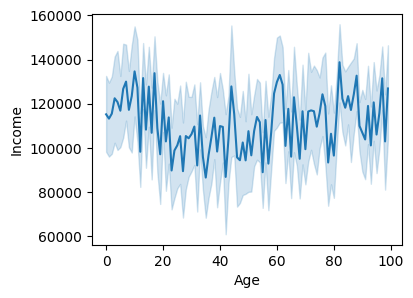

In [ ]:
plt.figure(figsize = (4,3))
sns.lineplot(x = 'Age', data = data, y = 'Income')

###Numeric to Categoric

In [ ]:
'''data.Age = pd.cut(data.Age, [0,20,40,60,80,100], labels=['anak-anak', 'dewasa', 'orangtua', 'lansia', 'lansiaakut'])
data.head()'''

"data.Age = pd.cut(data.Age, [0,20,40,60,80,100], labels=['anak-anak', 'dewasa', 'orangtua', 'lansia', 'lansiaakut'])\ndata.head()"

In [ ]:
'''data.Income = pd.cut(data.Income, [0,1000,10000,100000,190000], labels=['low', 'middle', 'rich', 'extreme'])
data.head()'''

"data.Income = pd.cut(data.Income, [0,1000,10000,100000,190000], labels=['low', 'middle', 'rich', 'extreme'])\ndata.head()"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2000 non-null   int64 
 1   Income         2000 non-null   int64 
 2   Spending       2000 non-null   int64 
 3   Profession     1965 non-null   object
 4   Experience     2000 non-null   int64 
 5   FamilySize     2000 non-null   int64 
 6   Gender_Female  2000 non-null   uint8 
 7   Gender_Male    2000 non-null   uint8 
dtypes: int64(5), object(1), uint8(2)
memory usage: 113.3+ KB


#Data Splitting

In [ ]:
X = data.drop(columns = ['Profession'])
y = data.Profession

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 7), (400, 7), (1600,), (400,))

#Preprocessing

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['Age','Spending','Income', 'Experience', 'FamilySize']),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender_Female', 'Gender_Male'])
])

#Training

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1, error_score='raise')
model.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Spending',
                                                                          'Income',
                                                                          'Experience',
                                                                          'FamilySize']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender_Female',
                                                                          'Gender_Male'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'algo__p': [1, 1.5, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

#Parameter Tuning

In [ ]:
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'algo__n_neighbors': 27, 'algo__p': 1.5, 'algo__weights': 'uniform'}
0.314375 0.29187600864772695 0.305
